# Travail Classification et Courbe ROC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Cancer du sein.csv")
dataset.tail()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
295,4,1,1,1,2,1,3,1,1,begnin
296,5,1,1,4,2,1,3,1,1,begnin
297,5,1,1,1,2,1,2,1,1,begnin
298,5,7,9,8,6,10,8,10,1,malignant
299,5,1,1,1,2,1,2,1,1,begnin


In [3]:
dataset.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 9)
(90, 9)
(210,)
(90,)


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn import metrics
lra = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',lra)

Accuracy:  0.9777777777777777


In [9]:
dtps = metrics.precision_score(y_test, y_pred, average='binary', pos_label='begnin')
print('Precision score: ',dtps)

Precision score:  0.9655172413793104


In [10]:
dtrs = metrics.recall_score(y_test, y_pred, pos_label='begnin')
print('Recall score: ',dtrs)

Recall score:  1.0


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[56  0]
 [ 2 32]]


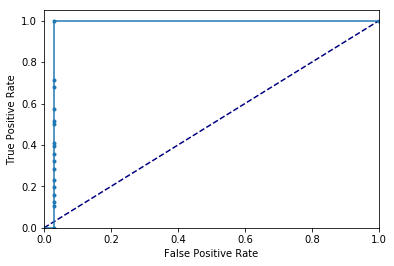

In [12]:
from sklearn.metrics import roc_curve

y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)
y_pred_proba = y_pred_proba[:,0]
fprlr, tprlr, thresholds = roc_curve(y_test,y_pred_proba,pos_label="begnin")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fprlr, tprlr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
rfa = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',rfa)

Accuracy:  0.9555555555555556


In [14]:
dtps = metrics.precision_score(y_test, y_pred, average='binary', pos_label='begnin')
print('Precision score: ',dtps)

Precision score:  0.9642857142857143


In [15]:
dtrs = metrics.recall_score(y_test, y_pred, pos_label='begnin')
print('Recall score: ',dtrs)

Recall score:  0.9642857142857143


In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[54  2]
 [ 2 32]]


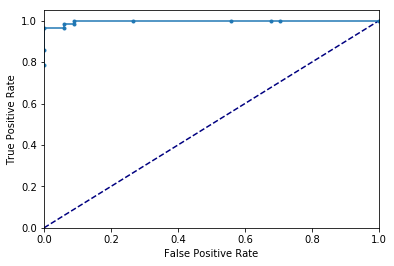

In [17]:
y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)
y_pred_proba = y_pred_proba[:,0]
fprrf, tprrf, thresholds = roc_curve(y_test,y_pred_proba,pos_label="begnin")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fprrf, tprrf, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred=model.predict(X_test)
dta = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',dta)

Accuracy:  0.9444444444444444


In [19]:
dtps = metrics.precision_score(y_test, y_pred, average='binary', pos_label='begnin')
print('Precision score: ',dtps)

Precision score:  0.9473684210526315


In [20]:
dtrs = metrics.recall_score(y_test, y_pred, pos_label='begnin')
print('Recall score: ',dtrs)

Recall score:  0.9642857142857143


In [21]:
dtf1 = metrics.f1_score(y_test, y_pred, average='binary', pos_label='begnin')
print('F1 score: ',dtf1)

F1 score:  0.9557522123893805


In [22]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[54  2]
 [ 3 31]]


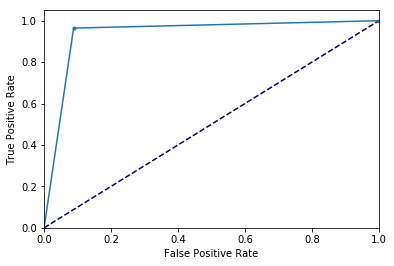

In [23]:
from sklearn.metrics import roc_curve

y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)
y_pred_proba = y_pred_proba[:,0]
fprdt, tprdt, thresholds = roc_curve(y_test,y_pred_proba,pos_label="begnin")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fprdt, tprdt, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

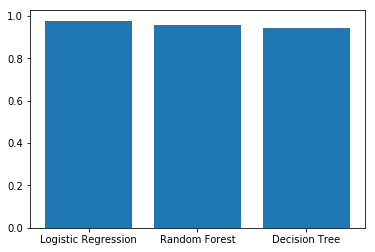

In [24]:
algorithms = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [lra, rfa, dta]
plt.bar(algorithms, accuracies);

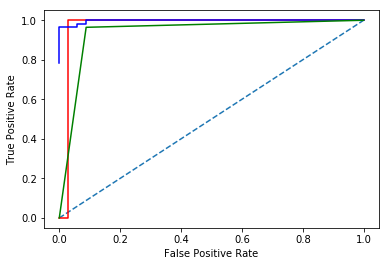

In [25]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fprlr, tprlr,color='red',label='Logistic Regression')
plt.plot(fprrf, tprrf,color='blue',label='Random Forest')
plt.plot(fprdt, tprdt,color='green',label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()